In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

In [41]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [42]:
img_height = 180
img_width = 180

In [43]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size =(img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [44]:
data_category = data_train.class_names

In [45]:
data_category

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [46]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = True,
    validation_split = False)
    

Found 351 files belonging to 36 classes.


In [47]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = True,
    validation_split = False)

Found 359 files belonging to 36 classes.


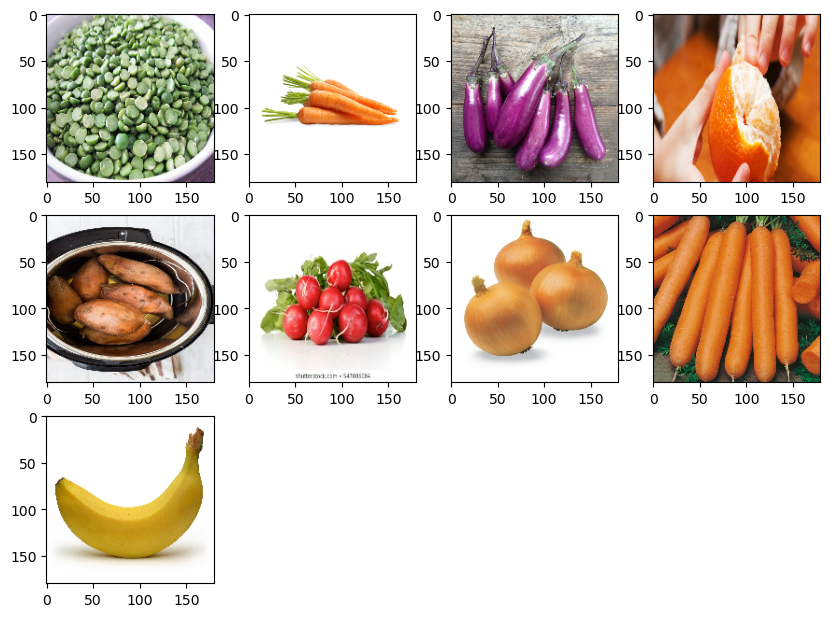

In [48]:
plt.figure(figsize =( 10,10))

for image,labels in data_train.take(1):
    for i in range (9):
        plt.subplot(4, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        

In [49]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0, 2),
    layers.Dense(128),
    layers.Dense(len(data_category))
]);
    
    

In [50]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [51]:
epochs_size = 35
history = model.fit(data_train,
                    validation_data= data_val,
                    epochs=epochs_size)

Epoch 1/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.0465 - loss: 3.8375 - val_accuracy: 0.2023 - val_loss: 2.6967
Epoch 2/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.2403 - loss: 2.6958 - val_accuracy: 0.5014 - val_loss: 1.7406
Epoch 3/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.4030 - loss: 2.0877 - val_accuracy: 0.7464 - val_loss: 1.0068
Epoch 4/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.5826 - loss: 1.4513 - val_accuracy: 0.8575 - val_loss: 0.5592
Epoch 5/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.7361 - loss: 0.8752 - val_accuracy: 0.9202 - val_loss: 0.4604
Epoch 6/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - accuracy: 0.8721 - loss: 0.5063 - val_accuracy: 0.9316 - val_loss: 0.4029
Epoch 7/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.9244 - loss: 0.3517 - val_accuracy: 0.9487 - val_loss: 0.3637
Epoch 8/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.9519 - loss: 0.2225 - val_accu

Text(0.5, 1.0, 'Loss')

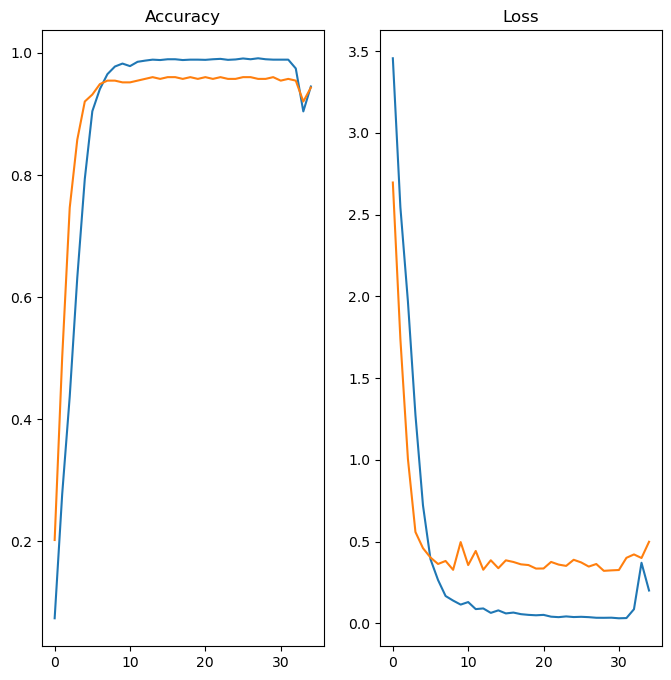

In [52]:
epochs_range = range(epochs_size)
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Accuracy')
plt.title('Loss')

In [53]:
model.save('image_class.keras')